21BDS0301 GATTA JAYA MANI DEEPAK

DIGITAL ASSIGNMENT 1

EXPLORATORY DATA ANALYSIS

SLOT - D1

MODULE 1 - Introduction to Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\lulor\\Downloads\\happiness.csv")

In [3]:
# Steps in EDA
print("Step 1: Understanding Data Structure")
display(df.head())
df.info()

print("Step 2: Checking for Missing Values")
print(df.isnull().sum())

print("Step 3: Summary Statistics")
print(df.describe())

# Data Types - Numerical (Discrete and Continuous) and Categorical
discrete_cols = ['vhappy', 'black', 'female', 'blackfemale']
continuous_cols = ['prestige', 'educ', 'babies', 'preteen', 'teens', 'tvhours']
categorical_cols = ['workstat', 'divorce', 'widowed', 'region', 'happy']


Step 1: Understanding Data Structure


,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     17137 non-null  int64  
 1   year         17137 non-null  int64  
 2   workstat     17134 non-null  object 
 3   prestige     16283 non-null  float64
 4   divorce      9754 non-null   object 
 5   widowed      11096 non-null  object 
 6   educ         17093 non-null  float64
 7   reg16        17137 non-null  object 
 8   babies       17036 non-null  float64
 9   preteen      17036 non-null  float64
 10  teens        17049 non-null  float64
 11  income       15045 non-null  object 
 12  region       17137 non-null  object 
 13  attend       16864 non-null  object 
 14  happy        17137 non-null  object 
 15  owngun       11297 non-null  object 
 16  tvhours      11794 non-null  float64
 17  vhappy       17137 non-null  int64  
 18  mothfath16   17132 non-null  float64
 19  blac

MODULE 2: Data Transformation

In [22]:
# Deduplication - Removing duplicate rows
df = df.drop_duplicates()

In [23]:
# Replacing Values - Handling incorrect values
df['happy'] = df['happy'].replace({'very happy': 'vhappy', 'not happy': 'unhappy'})

In [24]:
# Discretization and Binning
df['educ_bins'] = pd.cut(df['educ'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [25]:
# Handling Missing Data - Traditional Methods and Maximum Likelihood Estimation
# Filling missing numerical values with median
for col in continuous_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [26]:
# Filling missing categorical values with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("Dataset after Data Transformation - ")
df.head()

Dataset after Data Transformation - 


,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,educ_bins
0,1,1994,keeping house,46.0,no,iap,12.0,middle atlantic,2.0,3.0,...,0.0,1,0,0,0,0,0,0,1.0,High
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0.0,High
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,1.0,1,0,0,0,0,0,0,NaN,High
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1.0,Medium
4,5,1994,working parttime,36.0,no,iap,13.0,middle atlantic,0.0,1.0,...,0.0,1,0,0,0,0,0,0,0.0,High


MODULE 3: Correlation Analysis and Time Series Analysis

C:\Users\lulor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


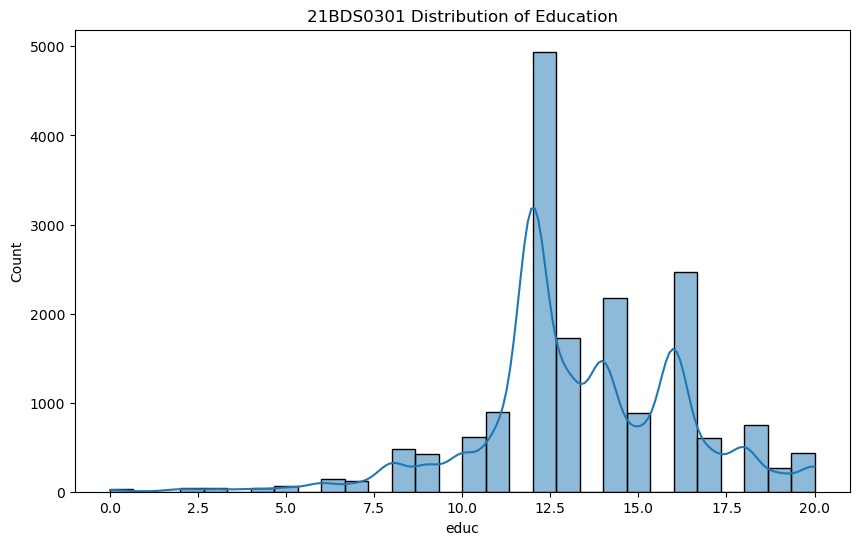

In [11]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['educ'], kde=True, bins=30)
plt.title('21BDS0301 Distribution of Education')
plt.show()

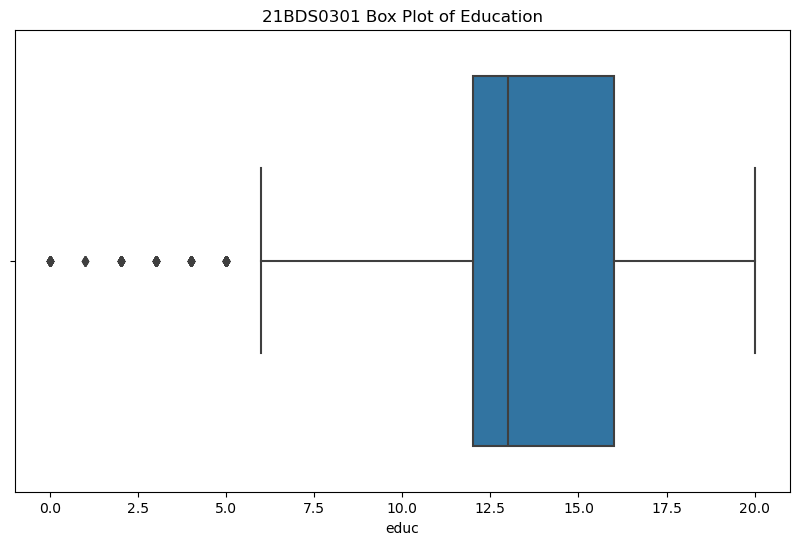

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['educ'])
plt.title('21BDS0301 Box Plot of Education')
plt.show()

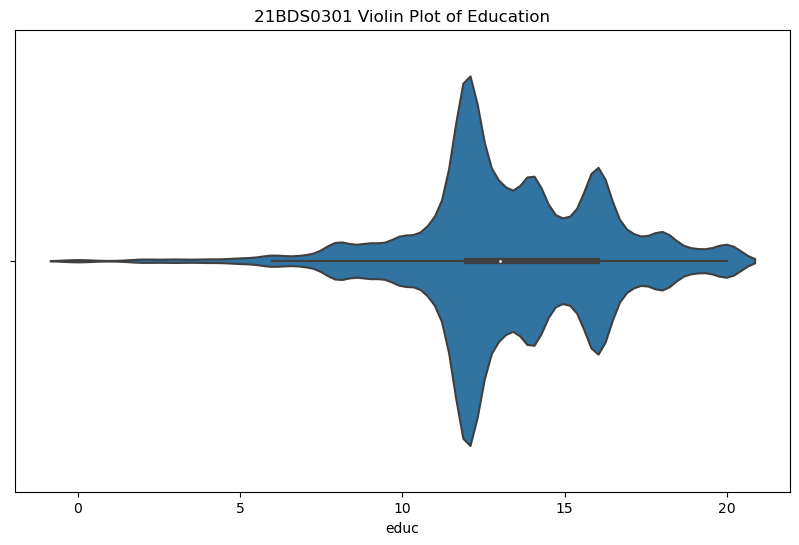

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['educ'])
plt.title('21BDS0301 Violin Plot of Education')
plt.show()

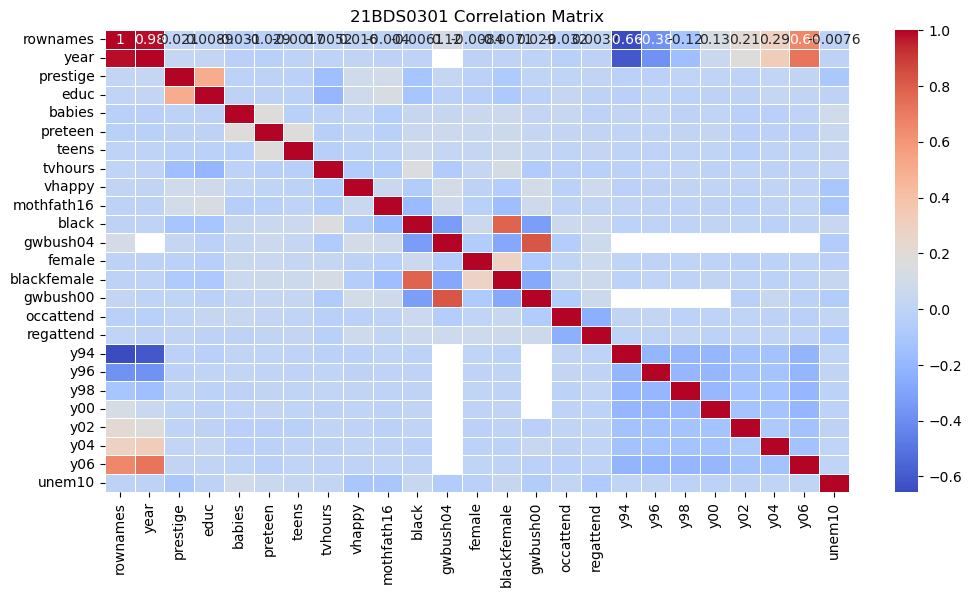

In [14]:
# Bivariate Analysis - Correlation Heatmap
# Bivariate Analysis - Correlation Heatmap
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("21BDS0301 Correlation Matrix")
plt.show()

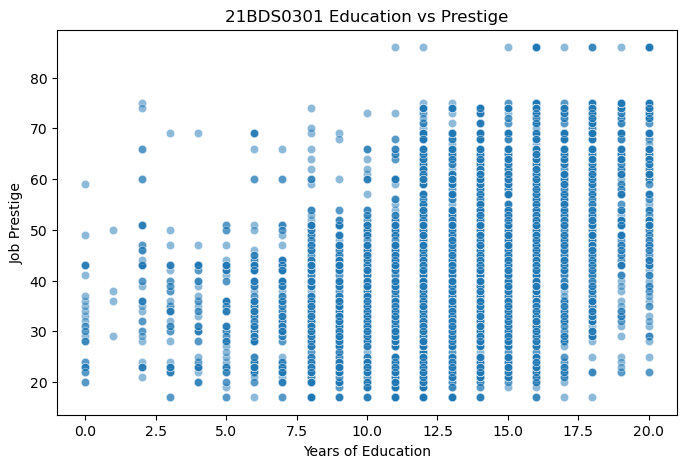

In [15]:
# Bivariate Analysis - Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='educ', y='prestige', alpha=0.5)
plt.title("21BDS0301 Education vs Prestige")
plt.xlabel("Years of Education")
plt.ylabel("Job Prestige")
plt.show()

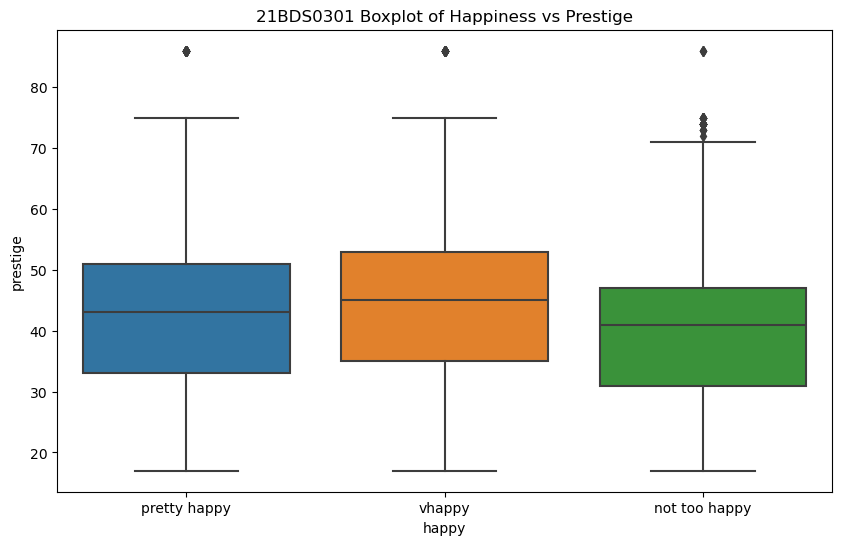

In [17]:
# Bivariate Analysis - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['happy'], y=df['prestige'])
plt.title('21BDS0301 Boxplot of Happiness vs Prestige')
plt.show()

C:\Users\lulor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lulor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lulor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lulor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

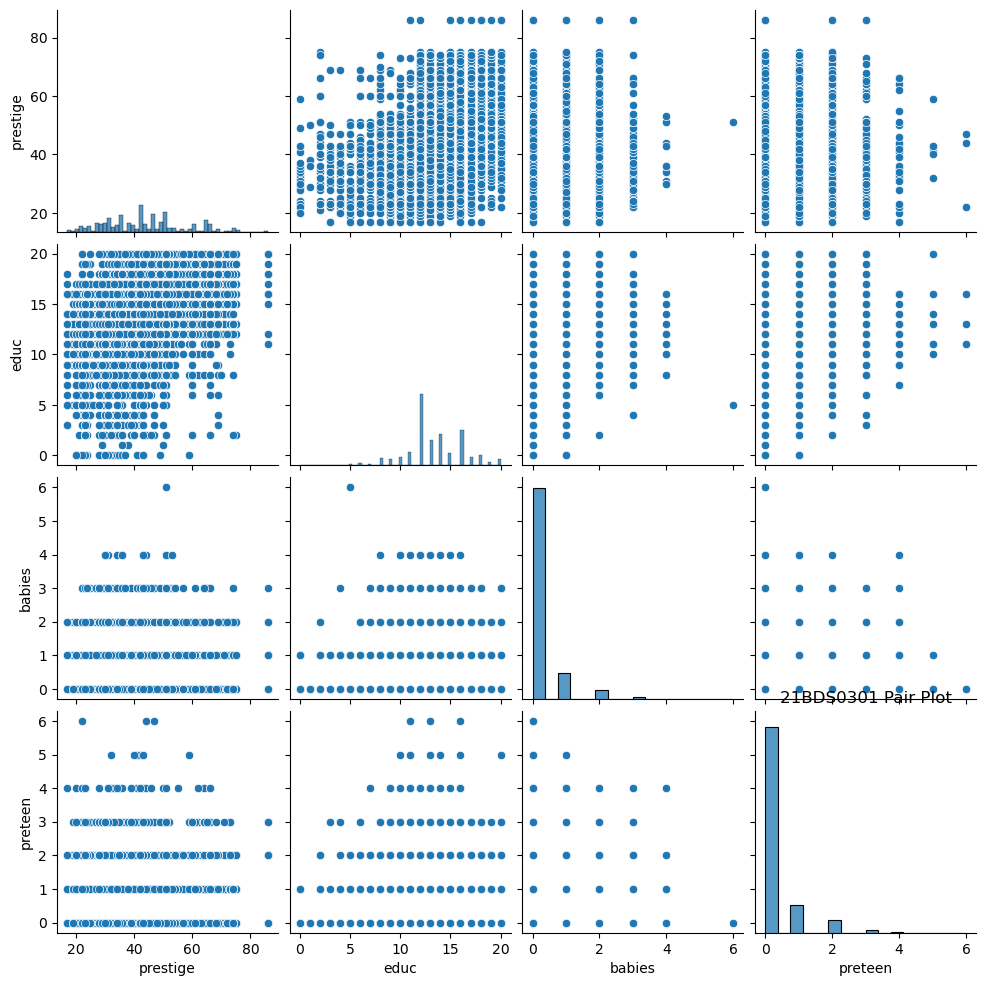

In [19]:
# Multivariate Analysis - Pairplot
sns.pairplot(df[continuous_cols[:4]])
plt.title("21BDS0301 Pair Plot")
plt.show()

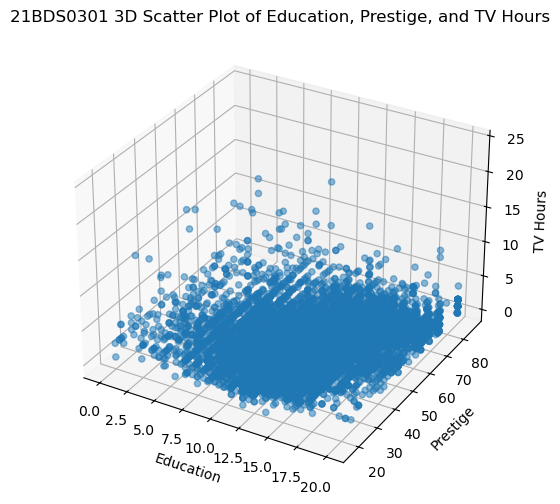

In [21]:
# Multivariate Analysis - 3D Scatterplot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['educ'], df['prestige'], df['tvhours'], alpha=0.5)
ax.set_xlabel("Education")
ax.set_ylabel("Prestige")
ax.set_zlabel("TV Hours")
plt.title("21BDS0301 3D Scatter Plot of Education, Prestige, and TV Hours")
plt.show()